In [1]:
import daggen as dg
import igraph as ig
import networkx as nx


In [2]:
dag = dg.DAG(seed=42, num_tasks=15)
tasks, edges = dag.task_n_edge_dicts()
igraph_dag = ig.Graph.DictList(vertices=tasks, edges=edges, directed=True)

In [8]:
dag.task_n_edge_dicts()

([{'name': 1, 'computation': 16914033713, 'alpha': 0.07},
  {'name': 2, 'computation': 360135446684, 'alpha': 0.02},
  {'name': 3, 'computation': 6750425784, 'alpha': 0.11},
  {'name': 4, 'computation': 549755813888, 'alpha': 0.09},
  {'name': 5, 'computation': 305069696267, 'alpha': 0.15},
  {'name': 6, 'computation': 368293445632, 'alpha': 0.05},
  {'name': 7, 'computation': 1058914813501, 'alpha': 0.05},
  {'name': 8, 'computation': 35107362552, 'alpha': 0.2},
  {'name': 9, 'computation': 449677085474, 'alpha': 0.06},
  {'name': 10, 'computation': 113129967660, 'alpha': 0.2},
  {'name': 11, 'computation': 24931758673, 'alpha': 0.06},
  {'name': 12, 'computation': 1149566905794, 'alpha': 0.09},
  {'name': 13, 'computation': 133629115595, 'alpha': 0.2},
  {'name': 14, 'computation': 3787324299, 'alpha': 0.19},
  {'name': 15, 'computation': 368293445632, 'alpha': 0.16}],
 [{'source': 1, 'target': 4, 'data': 679477248},
  {'source': 2, 'target': 3, 'data': 536870912},
  {'source': 3, 't

In [3]:
dag = dg.DAG(seed=46, num_tasks=15, density=1)
tasks, edges = dag.task_n_edge_tuples()
net_dag = nx.DiGraph()
net_dag.add_nodes_from(tasks)
net_dag.add_edges_from(edges)

In [17]:
import matplotlib.pyplot as plt

In [6]:
# tasks, edges = dag.task_n_edge_tuples()
# nx_dag = nx.DiGraph()
# nx_dag.add_nodes_from(tasks)
# nx_dag.add_edges_from(edges)

# for layer, nodes in enumerate(sorted(nx.topological_generations(nx_dag), reverse=True)):
#     # multipartite_layout expects the layer as a node attribute,
#     # so add the numeric layer value as a node attribute
#     for node in nodes:
#         nx_dag.nodes[node]["layer"] = layer

#     # Compute the multipartite_layout using the "layer" node attribute
#     pos = nx.multipartite_layout(nx_dag, subset_key="layer", align='horizontal')
#     nx.draw(nx_dag, pos=pos, ax=axs[i], with_labels=True,
#           node_color="lightblue", node_size=400, font_family="sans-serif")

In [7]:
import daggen as dg

# To seed daggen
seed = 46464

# Used to vary the values of fat and density parameters
values = [0.3, 0.45, 0.6, 0.7]

# Number of tasks in each generated DAG
num_tasks = [7, 10, 15, 30]

dg_dags = [] # to store the daggen DAGs

for v, n in zip(values, num_tasks):
  dg_dags.append(dg.DAG(seed=0, num_tasks=n, density=1, regular=1))

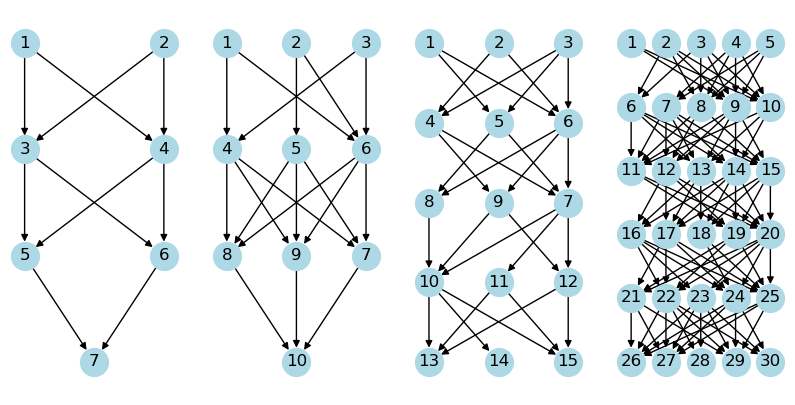

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

height = 10  # height of a plot
width = 5    # width of a plot

fig, axs = plt.subplots(1, len(values), figsize=(height, width))

for i, dag in enumerate(dg_dags):
    tasks, edges = dag.task_n_edge_tuples()
    nx_dag = nx.DiGraph()
    nx_dag.add_nodes_from(tasks)
    nx_dag.add_edges_from(edges)

    for layer, nodes in enumerate(sorted(nx.topological_generations(nx_dag), reverse=True)):
        # multipartite_layout expects the layer as a node attribute,
        # so add the numeric layer value as a node attribute
        for node in nodes:
            nx_dag.nodes[node]["layer"] = layer
    
    # Compute the multipartite_layout using the "layer" node attribute
    pos = nx.multipartite_layout(nx_dag, subset_key="layer", align='horizontal')
    nx.draw(nx_dag, pos=pos, ax=axs[i], with_labels=True,
          node_color="lightblue", node_size=400, font_family="sans-serif")



In [12]:
from networkx.readwrite import json_graph
from networkx.drawing.nx_pydot import write_dot
import pydot
import json

In [13]:
for i, dag in enumerate(dg_dags):
    tasks, edges = dag.task_n_edge_tuples()
    nx_dag = nx.DiGraph()
    nx_dag.add_nodes_from(tasks)
    nx_dag.add_edges_from(edges)

    write_dot(nx_dag, "./test.dot")

    json_data = json_graph.node_link_data(nx_dag)

    with open("test.json", "w") as f:
        json.dump(json_data, f, indent=4)


In [45]:
dag = dg.DAG(seed=38, num_tasks=20, density=1)

In [46]:
dag.task_n_edge_dicts()

([{'name': 1, 'computation': 252665362872, 'alpha': 0.04},
  {'name': 2, 'computation': 5673771415, 'alpha': 0.08},
  {'name': 3, 'computation': 368293445632, 'alpha': 0.1},
  {'name': 4, 'computation': 27892228089, 'alpha': 0.2},
  {'name': 5, 'computation': 2815110853, 'alpha': 0.03},
  {'name': 6, 'computation': 11471899410, 'alpha': 0.06},
  {'name': 7, 'computation': 4942522435, 'alpha': 0.15},
  {'name': 8, 'computation': 647799252469, 'alpha': 0.07},
  {'name': 9, 'computation': 28991029248, 'alpha': 0.09},
  {'name': 10, 'computation': 782757789696, 'alpha': 0.09},
  {'name': 11, 'computation': 368293445632, 'alpha': 0.09},
  {'name': 12, 'computation': 782757789696, 'alpha': 0.19},
  {'name': 13, 'computation': 424078292590, 'alpha': 0.0},
  {'name': 14, 'computation': 43529196943, 'alpha': 0.14},
  {'name': 15, 'computation': 411669320294, 'alpha': 0.04},
  {'name': 16, 'computation': 9664365441, 'alpha': 0.18},
  {'name': 17, 'computation': 68719476736, 'alpha': 0.03},
  {'n

In [ ]:
dag.task_n_edge_tuples()

In [37]:
dag = dg.DAG(seed=38, num_tasks=20, density=1)

In [38]:
nx_dag = nx.DiGraph()
tasks, edges = dag.task_n_edge_tuples()
nx_dag.add_nodes_from(tasks)
nx_dag.add_edges_from(edges)

In [39]:
nx_dag.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [40]:
nx_dag.edges

OutEdgeView([(1, 6), (1, 7), (2, 6), (2, 7), (3, 5), (3, 6), (4, 5), (4, 6), (4, 7), (5, 8), (5, 9), (5, 10), (6, 8), (6, 10), (7, 8), (7, 10), (8, 11), (8, 12), (8, 13), (9, 11), (9, 12), (9, 13), (10, 11), (10, 12), (10, 13), (11, 14), (11, 16), (12, 14), (12, 16), (13, 15), (13, 16), (14, 17), (14, 20), (15, 17), (15, 18), (15, 19), (15, 20), (16, 17), (16, 19), (16, 20)])

In [43]:
nx_dag.nodes(data=True)

NodeDataView({1: {'computation': 252665362872, 'alpha': 0.04}, 2: {'computation': 5673771415, 'alpha': 0.08}, 3: {'computation': 368293445632, 'alpha': 0.1}, 4: {'computation': 27892228089, 'alpha': 0.2}, 5: {'computation': 2815110853, 'alpha': 0.03}, 6: {'computation': 11471899410, 'alpha': 0.06}, 7: {'computation': 4942522435, 'alpha': 0.15}, 8: {'computation': 647799252469, 'alpha': 0.07}, 9: {'computation': 28991029248, 'alpha': 0.09}, 10: {'computation': 782757789696, 'alpha': 0.09}, 11: {'computation': 368293445632, 'alpha': 0.09}, 12: {'computation': 782757789696, 'alpha': 0.19}, 13: {'computation': 424078292590, 'alpha': 0.0}, 14: {'computation': 43529196943, 'alpha': 0.14}, 15: {'computation': 411669320294, 'alpha': 0.04}, 16: {'computation': 9664365441, 'alpha': 0.18}, 17: {'computation': 68719476736, 'alpha': 0.03}, 18: {'computation': 3029467806, 'alpha': 0.19}, 19: {'computation': 11491780925, 'alpha': 0.06}, 20: {'computation': 21853704917, 'alpha': 0.06}})

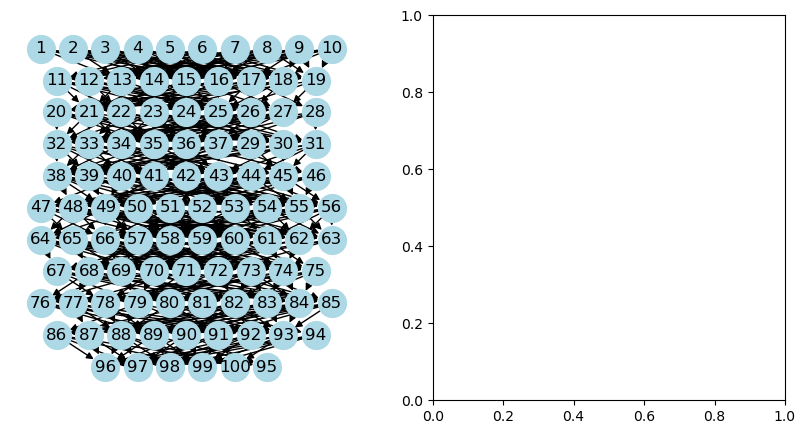

In [23]:
height = 10  # height of a plot
width = 5    # width of a plot

fig, axs = plt.subplots(1, 2, figsize=(height, width))

for layer, nodes in enumerate(sorted(nx.topological_generations(nx_dag), reverse=True)):
    # multipartite_layout expects the layer as a node attribute,
    # so add the numeric layer value as a node attribute
    for node in nodes:
        nx_dag.nodes[node]["layer"] = layer
pos = nx.multipartite_layout(nx_dag, subset_key="layer", align='horizontal')
nx.draw(nx_dag, pos=pos, ax=axs[0], with_labels=True,
    node_color="lightblue", node_size=400, font_family="sans-serif")

In [2]:
import yaml

def nx_convert_to_yaml(G):
    # Initialize the YAML structure
    yaml_data = {'inputs': [], 'tasks': []}

    # Iterate over nodes to define tasks
    for node in G.nodes(data=True):
        task_name = str(node[0])
        task_data = {
            'name': task_name,
            'flops': node[1].get('computation', 0),
            'memory': node[1].get('memory', 0),
            'inputs': [],
            'outputs': []
        }

        # Add outputs based on edges
        for successor in G.successors(node[0]):
            output_name = f"{task_name}-output-{successor}"
            task_data['outputs'].append({'name': output_name, 'size': G[node[0]][successor].get('data', 0)})

        yaml_data['tasks'].append(task_data)

    # Assign inputs based on nodes with no predecessors
    for node in G.nodes():
        if G.in_degree(node) == 0:
            input_name = f"{node}-input"
            yaml_data['inputs'].append({'name': input_name, 'size': 500})
            # Assign this input to the corresponding task
            for task in yaml_data['tasks']:
                if task['name'] == node:
                    task['inputs'].append(input_name)

    # Assign inputs to tasks based on predecessors' outputs
    for task in yaml_data['tasks']:
        task_name = task['name']
        for predecessor in G.predecessors(int(task_name)):
            input_name = f"{predecessor}-output-{task_name}"
            task['inputs'].append(input_name)

    return yaml_data


In [47]:
# convert_to_yaml(nx_dag)

In [4]:
import yaml

def daggen_convert_to_yaml(tasks, edges):
    yaml_data = {'inputs': [], 'tasks': []}

    # Create a dictionary to map task names to their outputs
    task_outputs = {}

    # Process tasks to define them in the YAML structure
    for task in tasks:
        task_name = str(task['name'])
        task_data = {
            'name': task_name,
            'flops': task['computation'],
            'memory': 1000,  # Default value; adjust as needed
            'inputs': [],
            'outputs': []
        }
        yaml_data['tasks'].append(task_data)
        task_outputs[task_name] = []

    # Process edges to define inputs and outputs
    for edge in edges:
        source = str(edge['source'])
        target = str(edge['target'])
        data_size = edge['data']

        # Define the output of the source task
        output_name = f"{source}-output-{target}"
        task_outputs[source].append({'name': output_name, 'size': data_size})

        # Assign the output as input to the target task
        for task in yaml_data['tasks']:
            if task['name'] == target:
                task['inputs'].append(output_name)

    # Assign the outputs to the respective tasks
    for task in yaml_data['tasks']:
        task['outputs'] = task_outputs[task['name']]

    # Identify and define the overall inputs (tasks with no predecessors)
    all_targets = {edge['target'] for edge in edges}
    for task in yaml_data['tasks']:
        if int(task['name']) not in all_targets:
            input_name = f"{task['name']}-input"
            yaml_data['inputs'].append({'name': input_name, 'size': 500})
            task['inputs'].append(input_name)

    return yaml_data




In [219]:
def normalize(tasks, edges, norm_factor = 1000000):
    """
    Simple normalization for the tasks and edges
    of the generated daggen dags.
    """
    for i, task in enumerate(tasks):
        tasks[i]['computation'] = task['computation'] / norm_factor

    for i, edge in enumerate(edges):
        edges[i]['data'] = edge['data'] / norm_factor

In [217]:
import daggen as dg
import matplotlib.pyplot as plt
import networkx as nx
# Convert the DAG to the YAML structure
dag = dg.DAG(
    seed=38, num_tasks=20, density=1,
    ccr=1
)
tasks, edges = dag.task_n_edge_dicts()
yaml_structure = daggen_convert_to_yaml(tasks, edges)
# yaml_structure

# Generating random DAGs with increasing density

In [236]:
import random
num_tasks_list = [50, 150, 250, 350]
density_list = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
random_seeds = [random.randint(0, 1000) for _ in range(10)]
generated_dags = []

for num_tasks in num_tasks_list:
    for seed in random_seeds:
        for density in density_list:
            dag = dg.DAG(
                seed=seed, num_tasks=num_tasks,
                density=density, ccr=1
            )
            # generated_dags.append(dag)
            tasks, edges = dag.task_n_edge_dicts()
            normalize(tasks, edges)    
            yaml_structure = daggen_convert_to_yaml(tasks, edges)
        
            # Write the YAML structure to a file
            with open(f'./daggen dags/{num_tasks}-{seed}-{density}.yaml', 'w') as yaml_file:
                yaml.dump(yaml_structure, yaml_file, default_flow_style=False)
    

In [234]:
len(generated_dags)

50

In [214]:
norm_factor=1000000
for i, task in enumerate(tasks):
    tasks[i]['computation'] = task['computation'] / norm_factor

for i, edge in enumerate(edges):
    edges[i]['data'] = edge['data'] / norm_factor

In [215]:
tasks

[{'name': 1, 'computation': 252665.362872, 'alpha': 0.04},
 {'name': 2, 'computation': 5673.771415, 'alpha': 0.08},
 {'name': 3, 'computation': 368293.445632, 'alpha': 0.1},
 {'name': 4, 'computation': 27892.228089, 'alpha': 0.2},
 {'name': 5, 'computation': 2815.110853, 'alpha': 0.03},
 {'name': 6, 'computation': 11471.89941, 'alpha': 0.06},
 {'name': 7, 'computation': 4942.522435, 'alpha': 0.15},
 {'name': 8, 'computation': 647799.252469, 'alpha': 0.07},
 {'name': 9, 'computation': 28991.029248, 'alpha': 0.09},
 {'name': 10, 'computation': 782757.789696, 'alpha': 0.09},
 {'name': 11, 'computation': 368293.445632, 'alpha': 0.09},
 {'name': 12, 'computation': 782757.789696, 'alpha': 0.19},
 {'name': 13, 'computation': 424078.29259, 'alpha': 0.0},
 {'name': 14, 'computation': 43529.196943, 'alpha': 0.14},
 {'name': 15, 'computation': 411669.320294, 'alpha': 0.04},
 {'name': 16, 'computation': 9664.365441, 'alpha': 0.18},
 {'name': 17, 'computation': 68719.476736, 'alpha': 0.03},
 {'name

In [216]:
edges

[{'source': 1, 'target': 6, 'data': 536.870912},
 {'source': 1, 'target': 7, 'data': 536.870912},
 {'source': 2, 'target': 6, 'data': 134.217728},
 {'source': 2, 'target': 7, 'data': 134.217728},
 {'source': 3, 'target': 5, 'data': 411.041792},
 {'source': 3, 'target': 6, 'data': 411.041792},
 {'source': 4, 'target': 5, 'data': 679.477248},
 {'source': 4, 'target': 6, 'data': 679.477248},
 {'source': 4, 'target': 7, 'data': 679.477248},
 {'source': 5, 'target': 8, 'data': 75.497472},
 {'source': 5, 'target': 9, 'data': 75.497472},
 {'source': 5, 'target': 10, 'data': 75.497472},
 {'source': 6, 'target': 8, 'data': 209.7152},
 {'source': 6, 'target': 10, 'data': 209.7152},
 {'source': 7, 'target': 8, 'data': 134.217728},
 {'source': 7, 'target': 10, 'data': 134.217728},
 {'source': 8, 'target': 11, 'data': 411.041792},
 {'source': 8, 'target': 12, 'data': 411.041792},
 {'source': 8, 'target': 13, 'data': 411.041792},
 {'source': 9, 'target': 11, 'data': 75.497472},
 {'source': 9, 'targe

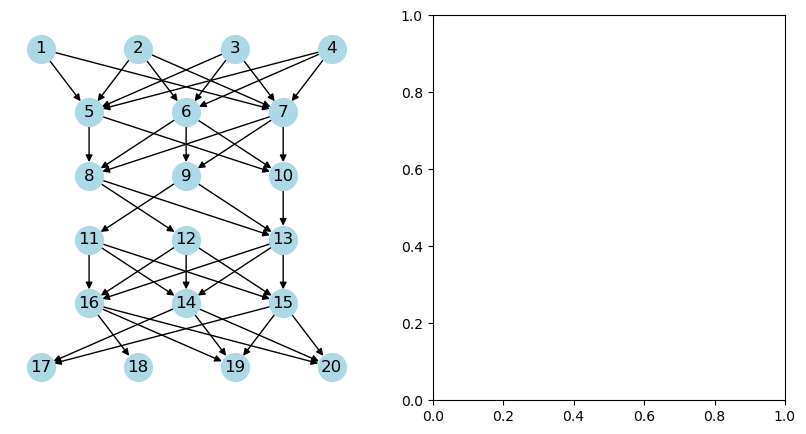

In [115]:
nx_dag = nx.DiGraph()
tasks, edges = dag.task_n_edge_tuples()
nx_dag.add_nodes_from(tasks)
nx_dag.add_edges_from(edges)

height = 10  # height of a plot
width = 5    # width of a plot

fig, axs = plt.subplots(1, 2, figsize=(height, width))

for layer, nodes in enumerate(sorted(nx.topological_generations(nx_dag), reverse=True)):
    # multipartite_layout expects the layer as a node attribute,
    # so add the numeric layer value as a node attribute
    for node in nodes:
        nx_dag.nodes[node]["layer"] = layer
pos = nx.multipartite_layout(nx_dag, subset_key="layer", align='horizontal')
nx.draw(nx_dag, pos=pos, ax=axs[0], with_labels=True,
    node_color="lightblue", node_size=400, font_family="sans-serif")

In [8]:
# Write the YAML structure to a file
with open('dag_output.yaml', 'w') as yaml_file:
    yaml.dump(yaml_structure, yaml_file, default_flow_style=False)